# ICML Paper Experiments

This is all the ICML paper stuff.

In [1]:
# python stuff
import pandas as pd
import numpy as np
import sklearn as sk
import scipy.sparse

# plotting
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sbs

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

## UCI Experiments

This loads and evalutes the models on some UCI datasets.

### Load Data

We load datasets and their characteristics into a `dict`.

In [3]:
from sklearn.datasets import fetch_mldata, load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

datasets = dict()

In [4]:
# auto mpg dataset
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
data = fetch_mldata('mpg')
X = data.data
y = data.target

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler_x = StandardScaler()
X_tr = scaler_x.fit_transform(X_tr)
X_ts = scaler_x.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

datasets['mpg'] = X_tr, y_tr, X_ts, y_ts

/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
X, y = load_boston(True)

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler_x = StandardScaler()
X_tr = scaler_x.fit_transform(X_tr)
X_ts = scaler_x.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

datasets['boston'] = X_tr, y_tr, X_ts, y_ts

In [6]:
# https://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df.columns = [str(i) for i in range(6)] + ['y']

X = df.iloc[:,:6].as_matrix()
y = df.iloc[:,6].as_matrix()

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

datasets['yacht'] = X_tr, y_tr, X_ts, y_ts

/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [7]:
# https://archive.ics.uci.edu/ml/datasets/Wine+Quality
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df1 = pd.read_csv(url1, sep=';')
# df.columns = [str(i) for i in range(6)] + ['y']

X = df1.iloc[:,:-6].as_matrix()
y = df1.iloc[:,-1].as_matrix()

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

datasets['wine'] = X_tr, y_tr, X_ts, y_ts

/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
X.shape, y.shape

((1599, 6), (1599,))

In [9]:
# https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
df = pd.read_csv(url, header=None)
df = df.replace('?', 0)

X = df1.iloc[:,5:-1].as_matrix()
y = df1.iloc[:,-1].as_matrix()

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

datasets['crime'] = X_tr, y_tr, X_ts, y_ts

/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [10]:
# # http://mldata.org/repository/data/viewslug/stockvalues/
# data = fetch_mldata('stockvalues')

# X = data.data[:,:-1]
# y = data.data[:,-1]

# X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

# scaler = StandardScaler()
# X_tr = scaler.fit_transform(X_tr)
# X_ts = scaler.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten() + 5
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten() + 5

# datasets['stocks'] = X_tr, y_tr, X_ts, y_ts

In [11]:
# http://mldata.org/repository/data/viewslug/regression-datasets-auto_price/
data = fetch_mldata('regression-datasets auto_price')
print(data.target.shape)
print(data.data.shape)

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

scaler_y = StandardScaler()
y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten() + 10
y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten() + 10

datasets['auto'] = X_tr, y_tr, X_ts, y_ts

(2, 159)
(159, 4)


/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by Standa

In [12]:
# http://mldata.org/repository/data/viewslug/regression-datasets-machine_cpu/
data = fetch_mldata('regression-datasets machine_cpu')

X = data.data[:,:-1]
y = data.data[:,-1]

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

datasets['cpu'] = X_tr, y_tr, X_ts, y_ts

/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by Standa

In [13]:
# http://mldata.org/repository/data/viewslug/regression-datasets-bank8fm/
data = fetch_mldata('regression-datasets bank8FM')
print(data.data.shape)

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

datasets['bank'] = X_tr, y_tr, X_ts, y_ts

(8192, 9)


/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by Standa

In [14]:
# http://mldata.org/repository/data/viewslug/regression-datasets-wisconsin/
data = fetch_mldata('regression-datasets wisconsin')

print(data.data.shape)
print(data.target.shape)
print(data.keys())

X = data.data
y = data.target

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

# scaler_y = StandardScaler()
# y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

datasets['wisconsin'] = X_tr, y_tr, X_ts, y_ts

(194, 23)
(194,)
dict_keys(['DESCR', 'COL_NAMES', 'int2', 'double3', 'int4', 'target', 'data'])


/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
# data = fetch_mldata('regression-datasets kin8nm')

# print(data.data.shape)
# print(data.keys())

# X = data.data[:,:-1]
# y = data.data[:,-1]

# X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

# scaler = StandardScaler()
# X_tr = scaler.fit_transform(X_tr)
# X_ts = scaler.transform(X_ts)

# # scaler_y = StandardScaler()
# # y_tr = scaler_y.fit_transform(y_tr[:,np.newaxis]).flatten()
# # y_ts = scaler_y.transform(y_ts[:,np.newaxis]).flatten()

# datasets['kinematics'] = X_tr, y_tr, X_ts, y_ts

In [16]:
for dataset, (X_tr, y_tr, X_ts, y_ts) in datasets.items():
    print(dataset, X_tr.shape[0] + X_ts.shape[0], X_ts.shape[1])

mpg 392 7
boston 506 13
yacht 308 6
wine 1599 6
crime 1599 6
auto 1599 6
cpu 209 6
bank 209 6
wisconsin 194 23


### Test On One Dataset

In [17]:
def mean_calibration_error(p_exp, p_obs):
    """Generate calibration plot.

      Parameters
      ----------
      p_exp : array-like of float
          The expected probailities
      p_obs : array-like of float
          The true (observed) probabilities
    """
    return np.sqrt(np.mean((p_exp - p_obs) ** 2))

In [18]:
from sklearn.metrics import \
(
    mean_squared_log_error,
    mean_absolute_error,
    explained_variance_score,
    r2_score
)
from src.eval import mean_calibration_error2

def mean_absolute_percentage_error(y_true, y_pred):
    delta = np.abs(y_true-y_pred)
    abs_y = np.abs(y_true)
    errs = delta[abs_y>0] / (abs_y[abs_y>0] + 1e-4)
    errs = errs[ np.abs(errs - errs.mean()) < 3*errs.std() ]
    return np.mean(errs)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean(y_true-y_pred)**2)

metrics = {
#     'msle' : mean_squared_log_error,
    'mae' : mean_absolute_error,
    'var' : explained_variance_score,
    'r2' : r2_score,
    'mape' : mean_absolute_percentage_error,
    'rmse' : root_mean_squared_error,
}

from src.linreg import BayesianLinearRegressor
from src.dnn import BayesianDNNForecaster
from src.dnn2 import CalibratedBayesianDNNForecaster

[2023-12-28 00:11:10] {init_logging.py:65} WARNING afresh-core dependencies are out-of-date; run `make install`
Using TensorFlow backend.


#### Regular Bayesian DNN

In [19]:
clf = BayesianLinearRegressor()
# clf = BayesianDNNForecaster()
X_tr, y_tr, X_ts, y_ts = datasets['boston']
clf.fit(X_tr, y_tr)

BayesianLinearRegressor(quantiles=[0.2, 0.4, 0.5, 0.6, 0.8])

In [20]:
y_tr_pred = clf.predict(X_tr)['y_pred']
y_ts_pred = clf.predict(X_ts)['y_pred']

In [21]:
for name, metric in metrics.items():
    print(name)
    print('  Train', metric(y_tr, y_tr_pred))
    print('  Test', metric(y_ts, y_ts_pred))

mae
  Train 3.1267120301975693
  Test 3.4250765742195806
var
  Train 0.7445309236034652
  Test 0.7232751504667847
r2
  Train 0.7445309236034652
  Test 0.7124413578665383
mape
  Train 0.1380923796214813
  Test 0.15479363611996366
rmse
  Train 1.246730657732102e-15
  Test 0.9952790297515476


In [22]:
from matplotlib import gridspec
def prep_calibration(model, df_data, y, q_values=np.arange(0, 1.05, 0.1)):
    """Prepare data for calibration plot.

    Model must implement predict_quantile method, which must return a
    dataframe with a 'y_pred' column.

    Parameters
    ----------
    model : object
        The model we want to evaluate.
    df_data : pandas.DataFrame
        Predictions for the model.
    y_true : array-like, shape = [n_samples]
        The true predictions.
    q_values : array-like
        The probability values at which we want to take observations.

    Returns
    -------
    q_pred : array-like of float
        Returns self.
    """
    p_obs = []
    n_tot = len(y)
    for q_val in q_values:
        q = model.predict_quantile(df_data, q=q_val).y_pred.values
        n_q = len([yi for yi, qi in zip(y, q) if yi < qi])
        p_obs += [n_q / float(n_tot)]
        # print q_val, n_q, p_obs[-1]

    return p_obs


def calibration_plot(*args, **kwargs):
    """Generate calibration plot.

    Parameters
    ----------
    p_exp : array-like of float
        The expected probabilities.
    p_obs : array-like of float
        The true (observed) probabilities.
    """
    # plt.figure(figsize=(4,4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

    # plot true vs. predicted
    ax0 = plt.subplot(gs[0])
    for i in range(int(len(args) / 2)):
        p_exp, p_obs = args[2 * i], args[2 * i + 1]
        ax0.plot(p_exp, p_obs)
        ax0.scatter(p_exp, p_obs)

    # plot straight line (ideal case)
    ax0.plot([0, 1], [0, 1], color='gray', alpha=0.5)
    ax0.set_xlim([-0.02, 1.02])

    # plot bucket sizes
    ax1 = plt.subplot(gs[1])
    n_obs = kwargs['n_obs']
    ax1.bar(p_exp, n_obs, width=0.02)
    ax1.set_xlim([-0.02, 1.02])

    plt.plot()

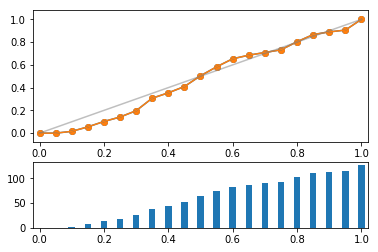

In [23]:
p_exp = np.arange(0,1.05,0.05)
p_obs = prep_calibration(clf, X_ts, y_ts, p_exp)
n_obs = [po * X_ts.shape[0] for po in p_obs]
# for pe, po in zip(p_exp, p_obs): print(pe, po)
calibration_plot(p_exp, p_obs, p_exp, p_obs, n_obs=n_obs)

In [24]:
for name, metric in metrics.items():
    print(name)
    print('  Train', metric(y_tr, y_tr_pred))
    print('  Test', metric(y_ts, y_ts_pred))

mae
  Train 3.1267120301975693
  Test 3.4250765742195806
var
  Train 0.7445309236034652
  Test 0.7232751504667847
r2
  Train 0.7445309236034652
  Test 0.7124413578665383
mape
  Train 0.1380923796214813
  Test 0.15479363611996366
rmse
  Train 1.246730657732102e-15
  Test 0.9952790297515476


#### Quantile-Calibrated Bayesian DNN

In [25]:
from src.calibrated1 import CalibratedRegressor
calibrated_model = CalibratedRegressor(clf)
calibrated_model.fit(X_tr, y_tr)


p_exp = np.arange(0,1,0.05)
p_obs = prep_calibration(calibrated_model, X_ts, y_ts, p_exp)
p_raw = prep_calibration(clf, X_ts, y_ts, p_exp)
n_obs = [po * X_ts.shape[0] for po in p_obs]
for pe, po in zip(p_exp, p_obs): print(pe, po)

0.0 0.0
0.05 0.015748031496062992
0.1 0.05511811023622047
0.15000000000000002 0.12598425196850394
0.2 0.13385826771653545
0.25 0.1968503937007874
0.30000000000000004 0.25196850393700787
0.35000000000000003 0.30708661417322836
0.4 0.3464566929133858
0.45 0.3858267716535433
0.5 0.4094488188976378
0.55 0.4566929133858268
0.6000000000000001 0.5196850393700787
0.65 0.5433070866141733
0.7000000000000001 0.6456692913385826
0.75 0.6850393700787402
0.8 0.7086614173228346
0.8500000000000001 0.7795275590551181
0.9 0.8661417322834646
0.9500000000000001 0.8976377952755905


0.056563582797395345
0.06372056670040879
0.06555262782945212
0.06297567646804987


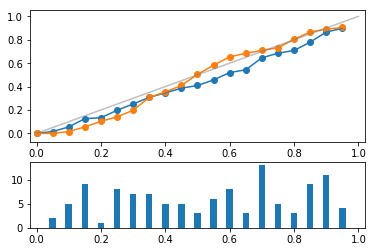

In [26]:
n_obs_bins = np.array([0] + list(np.diff(n_obs)))
calibration_plot(p_exp, p_obs, p_exp, p_raw, n_obs=n_obs_bins)
print(mean_calibration_error(p_exp, p_raw))
print(mean_calibration_error(p_exp, p_obs))
print(mean_calibration_error2(p_exp, p_raw, n_obs))
print(mean_calibration_error2(p_exp, p_obs, n_obs))

In [27]:
from src.eval import pinball_loss

alphas=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
q_pred=np.empty([y_ts.shape[0], alphas.shape[0]])
for i, alpha in enumerate(alphas):
    q_pred[:,i] = clf.predict_quantile(X_ts, alpha).to_numpy().flatten()
    
print(pinball_loss(y_ts, q_pred, alphas))

1.41354138117001


In [28]:
from src.eval import pinball_loss

alphas=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
q_pred=np.empty([y_ts.shape[0], alphas.shape[0]])
for i, alpha in enumerate(alphas):
    q_pred[:,i] = calibrated_model.predict_quantile(X_ts, alpha).to_numpy().flatten()
    
print(pinball_loss(y_ts, q_pred, alphas))

1.4170993907043843


In [29]:
X_ts.shape

(127, 13)

#### Distribution-Calibrated Bayesian DNN with Quantile Output: Manual Tests

Create dataset

In [30]:
# compute list of quantiles from base model
representation_quantiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
X_recal = np.zeros([y_tr.shape[0], len(representation_quantiles)])
for i, alpha in enumerate(representation_quantiles):
    X_recal[:, i] = clf.predict_quantile(X_tr, alpha).to_numpy().flatten()
    
# compute list of quantiles from base model
X_recal_ts = np.zeros([y_ts.shape[0], len(representation_quantiles)])
for i, alpha in enumerate(representation_quantiles):
    X_recal_ts[:, i] = clf.predict_quantile(X_ts, alpha).to_numpy().flatten()    

# create data
# X_recal = np.hstack([mean[:, np.newaxis], var[:, np.newaxis]])
X_recal = np.array(X_recal, dtype=np.float32)
X_tr = np.array(X_tr, dtype=np.float32)
y_tr = np.array(y_tr, dtype=np.float32)

# create data
# X_recal = np.hstack([mean[:, np.newaxis], var[:, np.newaxis]])
X_recal_ts = np.array(X_recal_ts, dtype=np.float32)
X_ts = np.array(X_ts, dtype=np.float32)
y_ts = np.array(y_ts, dtype=np.float32)

In [31]:
X_recal[2], y_tr[2]

(array([24.189863, 26.26575 , 27.762611, 29.041624, 30.237087, 31.432549,
        32.711563, 34.208424, 36.28431 ], dtype=float32), 32.5)

In [32]:
# y_tr_pred = clf.predict_quantile(X_tr, 0.5).to_numpy().flatten()
print(np.abs(X_recal[:,5]-y_tr).mean())
# y_ts_pred = clf.predict_quantile(X_ts, 0.5).to_numpy().flatten()
print(np.abs(X_recal_ts[:,5]-y_ts).mean())

3.5105748
3.6270797


In [33]:
print(X_recal.min(), X_recal.max(), y_tr.min(), y_tr.max())
print(X_recal_ts.min(), X_recal_ts.max(), y_ts.min(), y_ts.max())

-5.704947 49.544167 5.0 50.0
-10.916882 49.489086 5.6 50.0


In [34]:
X_recal = scaler.fit_transform(X_recal)
X_recal_ts = scaler.transform(X_recal_ts)

print(X_recal.min(), X_recal.max(), y_tr.min(), y_tr.max())
print(X_recal_ts.min(), X_recal_ts.max(), y_ts.min(), y_ts.max())

-2.8821704 2.7018776 5.0 50.0
-3.555615 2.6947308 5.6 50.0


In [35]:
import tensorflow as tf
from tensorflow import keras
from src.simple import QuantileRegressor
from sklearn.preprocessing import StandardScaler

# set up recalibrator
batch_size = 32
recalibrator_ = QuantileRegressor(batch_size=batch_size)
a_vals = 0.5*np.ones([X_recal.shape[0],1], dtype=np.float32)
recalibrator_.predict([X_recal, a_vals])

scaler = StandardScaler()
# X_recal = scaler.fit_transform(X_recal)

dataset = tf.data.Dataset.from_tensor_slices((X_recal, y_tr[:,np.newaxis]))
dataset = dataset.shuffle(400).repeat(100).batch(batch_size, drop_remainder=True)
recalibrator_.compile(optimizer=keras.optimizers.Adam(1e-3))
recalibrator_.fit(dataset, epochs=2)

Epoch 1/2
1184/1184 [==============================] - 1s 743us/step - loss: 2.3015 - mae: 5.1521
Epoch 2/2
1184/1184 [==============================] - 1s 736us/step - loss: 1.0215 - mae: 2.6467


In [36]:
X_recal_ts.shape

(127, 9)

In [37]:
# run recalibrator
a_vals = 0.5*np.ones([X_recal.shape[0],1], dtype=np.float32)
Y_pred = recalibrator_([X_recal, a_vals])
q_vals = np.array(Y_pred).flatten()

# return output
q_vals.shape

(379,)

In [38]:
np.abs(q_vals.flatten()-y_tr).mean()

2.6150377

In [39]:
print(q_vals[:5].flatten())
print(y_tr_pred[:5])
print(y_tr[:5])

[24.648355 25.725842 28.542845 19.232471 14.24001 ]
0    27.601031
1    28.388818
2    30.237087
3    19.684493
4    13.716376
Name: y_pred, dtype: float64
[23.9 28.7 32.5 13.3 13.3]


In [40]:
# run recalibrator
# X_recal_ts = scaler.fit_transform(X_recal_ts)
a_vals = 0.5*np.ones([X_recal_ts.shape[0],1], dtype=np.float32)
Y_pred = recalibrator_([X_recal_ts, a_vals])
q_vals = np.array(Y_pred).flatten()

In [41]:
np.abs(q_vals.flatten()-y_ts).mean()

3.078633

#### Distribution-Calibrated Bayesian DNN with Quantile Output

In [42]:
from src.calibrated2 import DistributionCalibratedQuantileRegressor

calibrated_model = DistributionCalibratedQuantileRegressor(clf)
X_ts2 = np.concatenate([X_ts, X_ts[[0],:]], axis=0)
y_ts2 = np.concatenate([y_ts, y_ts[[0]]], axis=0)
calibrated_model.fit(X_tr, y_tr, X_ts2, y_ts2)

Epoch 1/10
1175/1184 [============================>.] - ETA: 0s - loss: 1.4655 - mae: 3.2006

NotImplementedError: in user code:

    /Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /Users/kuleshov/work/afresh/afresh-notebooks/experiments/icml2021/src/simple.py:373 test_step
        q_pred[:,i] = np.array(self([x, a_vec])).flatten()
    /Users/kuleshov/work/env/afresh-core4/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:855 __array__
        " a NumPy call, which is not supported".format(self.name))

    NotImplementedError: Cannot convert a symbolic Tensor (quantile_regressor_1/dense_5/BiasAdd_2:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


In [72]:
p_exp = np.arange(0,1,0.05)
p_obs = prep_calibration(calibrated_model, X_tr, y_tr, p_exp)
p_raw = prep_calibration(clf, X_tr, y_tr, p_exp)
n_obs = [po * X_ts.shape[0] for po in p_obs]
for pe, po in zip(p_exp, p_obs): print(pe, po)

0.0 0.079155672823219
0.05 0.11609498680738786
0.1 0.16094986807387862
0.15000000000000002 0.19525065963060687
0.2 0.2638522427440633
0.25 0.316622691292876
0.30000000000000004 0.37730870712401055
0.35000000000000003 0.43007915567282323
0.4 0.5145118733509235
0.45 0.5778364116094987
0.5 0.633245382585752
0.55 0.6886543535620053
0.6000000000000001 0.7387862796833773
0.65 0.7810026385224275
0.7000000000000001 0.8179419525065963
0.75 0.8443271767810027
0.8 0.8680738786279684
0.8500000000000001 0.8891820580474934
0.9 0.9050131926121372
0.9500000000000001 0.9234828496042217


In [73]:
p_exp = np.arange(0,1,0.05)
p_obs = prep_calibration(calibrated_model, X_ts, y_ts, p_exp)
p_raw = prep_calibration(clf, X_ts, y_ts, p_exp)
n_obs = [po * X_ts.shape[0] for po in p_obs]
for pe, po in zip(p_exp, p_obs): print(pe, po)

0.0 0.11023622047244094
0.05 0.14173228346456693
0.1 0.1889763779527559
0.15000000000000002 0.2204724409448819
0.2 0.25984251968503935
0.25 0.31496062992125984
0.30000000000000004 0.3779527559055118
0.35000000000000003 0.48031496062992124
0.4 0.5275590551181102
0.45 0.5826771653543307
0.5 0.6377952755905512
0.55 0.7244094488188977
0.6000000000000001 0.7401574803149606
0.65 0.7874015748031497
0.7000000000000001 0.8267716535433071
0.75 0.8582677165354331
0.8 0.8740157480314961
0.8500000000000001 0.8818897637795275
0.9 0.8818897637795275
0.9500000000000001 0.8976377952755905


0.0592771416952526
0.1057051789042036
0.07390566802485989
0.05915173751030211


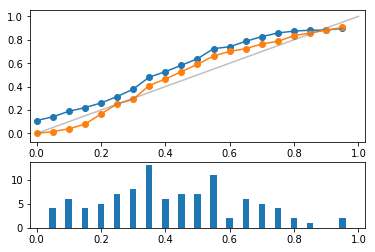

In [74]:
n_obs_bins = np.array([0] + list(np.diff(n_obs)))
calibration_plot(p_exp, p_obs, p_exp, p_raw, n_obs=n_obs_bins)
print(mean_calibration_error(p_exp, p_raw))
print(mean_calibration_error(p_exp, p_obs))
print(mean_calibration_error2(p_exp, p_raw, n_obs))
print(mean_calibration_error2(p_exp, p_obs, n_obs))

In [43]:
from src.eval import pinball_loss

alphas=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
q_pred=np.empty([y_ts.shape[0], alphas.shape[0]])
for i, alpha in enumerate(alphas):
    q_pred[:,i] = calibrated_model.predict_quantile(X_ts, alpha).to_numpy().flatten()
    
print(pinball_loss(y_ts, q_pred, alphas))

1.1105580563516027


In [46]:
from src.eval import pinball_loss

alphas=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
q_pred=np.empty([y_tr.shape[0], alphas.shape[0]])
for i, alpha in enumerate(alphas):
    q_pred[:,i] = calibrated_model.predict_quantile(X_tr, alpha).to_numpy().flatten()
    
print(pinball_loss(y_tr, q_pred, alphas))

1.2619363588379542


## Forecasting

Let's now load a model and use it to make forecasts.

In [208]:
from src.linreg import BayesianLinearRegressor
from src.calibrated1 import CalibratedRegressor
from src.calibrated2 import DistributionCalibratedRegressor
l_out = []
metric_names = ['rmse', 'r2', 'mape']
dataset_names = datasets.keys()
# dataset_names.remove('wisconsin')
# dataset_names.remove('yacht')
alphas=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

for dataset in dataset_names:
    print('Dataset: %s' % dataset)
    (X_tr, y_tr, X_ts, y_ts) = datasets[dataset]
    clf = BayesianLinearRegressor()
    clf.fit(X_tr, y_tr)
    y_ts_pred = clf.predict(X_ts)['y_pred']
    l_out0 = [dataset] + [metrics[m](y_ts, y_ts_pred) for m in metric_names]
    
    print('Recal 1')
    calibrated_model = CalibratedRegressor(clf)
    calibrated_model.fit(X_tr, y_tr)

    print('Recal 2')    
    calibrated_model2 = DistributionCalibratedQuantileRegressor(clf)
    calibrated_model2.fit(X_tr, y_tr)
    
    p_exp = np.arange(0,1,0.05)
    p_obs = prep_calibration(calibrated_model, X_ts, y_ts, p_exp)
    p_obs2 = prep_calibration(calibrated_model2, X_ts, y_ts, p_exp)    
    p_raw = prep_calibration(clf, X_ts, y_ts, p_exp)
    
    
    q_pred0=np.empty([y_ts.shape[0], alphas.shape[0]])
    q_pred1, q_pred2 = q_pred0.copy(), q_pred0.copy()
    for i, alpha in enumerate(alphas):
        q_pred0[:,i] = clf.predict_quantile(X_ts, alpha).to_numpy().flatten()
        q_pred1[:,i] = calibrated_model.predict_quantile(X_ts, alpha).to_numpy().flatten()
        q_pred2[:,i] = calibrated_model2.predict_quantile(X_ts, alpha).to_numpy().flatten()
    
    cal_err0 = mean_calibration_error(p_exp, p_raw)
    cal_err1 = mean_calibration_error(p_exp, p_obs)
    cal_err2 = mean_calibration_error(p_exp, p_obs2)
    pbl_err0 = pinball_loss(y_ts, q_pred0, alphas)
    pbl_err1 = pinball_loss(y_ts, q_pred1, alphas)
    pbl_err2 = pinball_loss(y_ts, q_pred2, alphas)
    l_out0 += [cal_err0, cal_err1, cal_err2, pbl_err0, pbl_err1, pbl_err2]
    
    l_out += [l_out0]
    
columns = ['dataset'] + metric_names + ['cal0', 'cal1', 'cal2', 'pbl0', 'pbl1', 'pbl2']
df_lin = pd.DataFrame(l_out, columns=columns)

Dataset: mpg
Recal 1
Recal 2
Epoch 1/2
918/918 [==============================] - 2s 2ms/step - loss: 1.2986 - mae: 2.7476
Epoch 2/2
918/918 [==============================] - 2s 2ms/step - loss: 0.9458 - mae: 2.3128
Dataset: boston
Recal 1
Recal 2
Epoch 1/2
1184/1184 [==============================] - 3s 2ms/step - loss: 1.6504 - mae: 3.4781
Epoch 2/2
1184/1184 [==============================] - 2s 2ms/step - loss: 1.2230 - mae: 3.1082
Dataset: yacht
Recal 1
Recal 2
Epoch 1/2
721/721 [==============================] - 2s 2ms/step - loss: 1.1760 - mae: 2.4171
Epoch 2/2
721/721 [==============================] - 1s 2ms/step - loss: 0.3463 - mae: 0.8636
Dataset: wine
Recal 1
Recal 2
Epoch 1/2
3746/3746 [==============================] - 7s 2ms/step - loss: 0.2113 - mae: 0.5955
Epoch 2/2
3746/3746 [==============================] - 7s 2ms/step - loss: 0.2085 - mae: 0.5945
Dataset: crime
Recal 1
Recal 2
Epoch 1/2
3746/3746 [==============================] - 7s 2ms/step - loss: 0.1979 - mae

In [209]:
df_lin

,dataset,rmse,r2,mape,cal0,cal1,cal2,pbl0,pbl1,pbl2
0,mpg,0.450487,0.842001,0.113878,0.058150,0.057111,0.108137,0.921462,0.915590,0.813040
1,boston,0.146133,0.750254,0.170834,0.066061,0.029571,0.045723,1.392054,1.364643,1.174831
2,yacht,0.228579,0.697256,3.799502,0.079251,0.062512,0.067130,2.438080,2.378720,0.341987
3,wine,0.048067,0.143069,0.105653,0.037241,0.026511,0.175934,0.240240,0.239304,0.275805
4,crime,0.036404,0.283343,0.087373,0.030842,0.018464,0.052977,0.202428,0.201750,0.203892
5,auto,0.073609,0.317768,0.057800,0.042643,0.031647,0.076775,0.251485,0.250364,0.258581
6,cpu,11.802386,0.895540,0.647345,0.083220,0.074292,0.297215,15.871333,15.463072,14.676257
7,bank,7.854822,0.897250,0.589829,0.114589,0.068910,0.277675,17.478473,16.638647,14.338159
8,wisconsin,0.173360,-0.001090,1.231798,0.170843,0.035722,0.116190,1.484555,1.246294,1.302537


In [263]:
from src.linreg import BayesianLinearRegressor
from src.calibrated1 import CalibratedRegressor
from src.calibrated2 import DistributionCalibratedRegressor
l_out = []
metric_names = ['rmse', 'r2', 'mape', 'mae']
dataset_names = datasets.keys()
# dataset_names.remove('wisconsin')
# dataset_names.remove('yacht')
alphas=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

for dataset in dataset_names:
    print('Dataset: %s' % dataset)
    (X_tr, y_tr, X_ts, y_ts) = datasets[dataset]
    
    for i in range(3):
        if i == 0:
            clf = BayesianLinearRegressor()
            clf.fit(X_tr, y_tr)
            y_ts_pred = clf.predict(X_ts)['y_pred']
            l_out0 = [dataset] + [metrics[m](y_ts, y_ts_pred) for m in metric_names]
            current_model = clf
        elif i == 1:
            print('Recal 1')
            current_model = CalibratedRegressor(clf)
            current_model.fit(X_tr, y_tr)
            y_ts_pred = current_model.predict(pd.DataFrame(X_ts))['y_pred']
            l_out0 += [metrics[m](y_ts, y_ts_pred) for m in metric_names]
        elif i == 2:
            print('Recal 2')    
            current_model = DistributionCalibratedQuantileRegressor(clf)
            current_model.fit(X_tr, y_tr)
            y_ts_pred = current_model.predict(X_ts).flatten()
            l_out0 += [metrics[m](y_ts, y_ts_pred) for m in metric_names]
    
        p_exp = np.arange(0,1,0.05)
        p_obs = prep_calibration(current_model, X_ts, y_ts, p_exp)
        cal_err = mean_calibration_error(p_exp, p_obs)

        q_pred=np.empty([y_ts.shape[0], alphas.shape[0]])
        for i, alpha in enumerate(alphas):
            q_pred[:,i] = current_model.predict_quantile(X_ts, alpha).to_numpy().flatten()
        pbl_err = pinball_loss(y_ts, q_pred, alphas)

        l_out0 += [cal_err, pbl_err]
    l_out += [l_out0]
    
columns = ['dataset'] + [name + str(i) for i in range(3) for name in metric_names + ['cal', 'pbl']]
df_lin = pd.DataFrame(l_out, columns=columns)

Dataset: mpg
Recal 1
Recal 2
Epoch 1/2
918/918 [==============================] - 1s 854us/step - loss: 1.6300 - mae: 3.2984
Epoch 2/2
918/918 [==============================] - 1s 787us/step - loss: 1.0668 - mae: 2.5524
Dataset: boston
Recal 1
Recal 2
Epoch 1/2
1184/1184 [==============================] - 1s 783us/step - loss: 1.4301 - mae: 3.2402
Epoch 2/2
1184/1184 [==============================] - 1s 799us/step - loss: 1.1939 - mae: 3.0705
Dataset: yacht
Recal 1
Recal 2
Epoch 1/2
721/721 [==============================] - 3s 807us/step - loss: 0.9938 - mae: 2.1069
Epoch 2/2
721/721 [==============================] - 1s 926us/step - loss: 0.3358 - mae: 0.8628
Dataset: wine
Recal 1
Recal 2
Epoch 1/2
3746/3746 [==============================] - 3s 811us/step - loss: 0.2198 - mae: 0.6104
Epoch 2/2
3746/3746 [==============================] - 3s 814us/step - loss: 0.2114 - mae: 0.6026
Dataset: crime
Recal 1
Recal 2
Epoch 1/2
3746/3746 [==============================] - 4s 891us/step - 

In [266]:
df_lin

,dataset,rmse0,r20,mape0,mae0,cal0,pbl0,rmse1,r21,mape1,mae1,cal1,pbl1,rmse2,r22,mape2,mae2,cal2,pbl2
0,mpg,0.450487,0.842001,0.113878,2.455689,0.058150,0.921462,0.495173,0.841226,0.114325,2.464739,0.057111,0.915590,1.486417,0.829293,0.115312,2.522474,0.242171,1.019060
1,boston,0.146133,0.750254,0.170834,3.459052,0.066061,1.392054,0.357935,0.748852,0.165103,3.399369,0.029571,1.364643,1.505169,0.794497,0.169434,3.349344,0.185549,1.361577
2,yacht,0.228579,0.697256,3.799502,6.171114,0.079251,2.438080,1.841331,0.681586,4.801745,5.963778,0.062512,2.378720,0.191856,0.990460,0.336303,0.908247,0.093393,0.351628
3,wine,0.048067,0.143069,0.105653,0.627606,0.037241,0.240240,0.040553,0.144005,0.105478,0.627217,0.026511,0.239304,0.113267,0.125897,0.106314,0.636713,0.047556,0.241340
4,crime,0.036404,0.283343,0.087373,0.515993,0.030842,0.202428,0.012409,0.285247,0.086286,0.513618,0.018464,0.201750,0.045399,0.280358,0.086312,0.516507,0.047272,0.203950
5,auto,0.073609,0.317768,0.057800,0.635482,0.042643,0.251485,0.013924,0.322838,0.056884,0.628751,0.031647,0.250364,0.120291,0.298099,0.059504,0.635803,0.064585,0.256677
6,cpu,11.802386,0.895540,0.647345,39.896125,0.083220,15.871333,6.605865,0.898922,0.636421,39.086244,0.074292,15.463072,15.957352,0.933759,0.324434,28.159797,0.252678,13.615109
7,bank,7.854822,0.897250,0.589829,39.507993,0.114589,17.478473,6.126668,0.897812,0.568345,39.147699,0.068910,16.638647,2.482587,0.942842,0.386924,29.314110,0.258207,14.274109
8,wisconsin,0.173360,-0.001090,1.231798,3.722096,0.170843,1.484555,2.083975,-0.149321,0.452650,2.858201,0.035722,1.246294,1.563150,-0.084004,0.581281,2.994933,0.103929,1.285391


In [267]:
ordered_columns = ['dataset'] + [name + str(i) for name in metric_names + ['cal', 'pbl'] for i in range(3)]
df_lin.loc[:,ordered_columns]

,dataset,rmse0,rmse1,rmse2,r20,r21,r22,mape0,mape1,mape2,mae0,mae1,mae2,cal0,cal1,cal2,pbl0,pbl1,pbl2
0,mpg,0.450487,0.495173,1.486417,0.842001,0.841226,0.829293,0.113878,0.114325,0.115312,2.455689,2.464739,2.522474,0.058150,0.057111,0.242171,0.921462,0.915590,1.019060
1,boston,0.146133,0.357935,1.505169,0.750254,0.748852,0.794497,0.170834,0.165103,0.169434,3.459052,3.399369,3.349344,0.066061,0.029571,0.185549,1.392054,1.364643,1.361577
2,yacht,0.228579,1.841331,0.191856,0.697256,0.681586,0.990460,3.799502,4.801745,0.336303,6.171114,5.963778,0.908247,0.079251,0.062512,0.093393,2.438080,2.378720,0.351628
3,wine,0.048067,0.040553,0.113267,0.143069,0.144005,0.125897,0.105653,0.105478,0.106314,0.627606,0.627217,0.636713,0.037241,0.026511,0.047556,0.240240,0.239304,0.241340
4,crime,0.036404,0.012409,0.045399,0.283343,0.285247,0.280358,0.087373,0.086286,0.086312,0.515993,0.513618,0.516507,0.030842,0.018464,0.047272,0.202428,0.201750,0.203950
5,auto,0.073609,0.013924,0.120291,0.317768,0.322838,0.298099,0.057800,0.056884,0.059504,0.635482,0.628751,0.635803,0.042643,0.031647,0.064585,0.251485,0.250364,0.256677
6,cpu,11.802386,6.605865,15.957352,0.895540,0.898922,0.933759,0.647345,0.636421,0.324434,39.896125,39.086244,28.159797,0.083220,0.074292,0.252678,15.871333,15.463072,13.615109
7,bank,7.854822,6.126668,2.482587,0.897250,0.897812,0.942842,0.589829,0.568345,0.386924,39.507993,39.147699,29.314110,0.114589,0.068910,0.258207,17.478473,16.638647,14.274109
8,wisconsin,0.173360,2.083975,1.563150,-0.001090,-0.149321,-0.084004,1.231798,0.452650,0.581281,3.722096,2.858201,2.994933,0.170843,0.035722,0.103929,1.484555,1.246294,1.285391


In [282]:
from src.dnn import BayesianDNNForecaster
from src.calibrated1 import CalibratedRegressor
from src.calibrated2 import DistributionCalibratedRegressor
l_out = []
metric_names = ['mae','rmse', 'r2', 'mape']
dataset_names = datasets.keys()
# dataset_names.remove('wisconsin')
# dataset_names.remove('yacht')
alphas=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

for dataset in dataset_names:
    print('Dataset: %s' % dataset)
    (X_tr, y_tr, X_ts, y_ts) = datasets[dataset]
    
    for i in range(3):
        if i == 0:
            clf = BayesianDNNForecaster()
            clf.fit(X_tr, y_tr)
            y_ts_pred = clf.predict(X_ts)['y_pred']
            l_out0 = [dataset] + [metrics[m](y_ts, y_ts_pred) for m in metric_names]
            current_model = clf
        elif i == 1:
            print('Recal 1')
            current_model = CalibratedRegressor(clf)
            current_model.fit(X_tr, y_tr)
            y_ts_pred = current_model.predict(pd.DataFrame(X_ts))['y_pred']
            l_out0 += [metrics[m](y_ts, y_ts_pred) for m in metric_names]
        elif i == 2:
            print('Recal 2')    
            current_model = DistributionCalibratedQuantileRegressor(clf)
            current_model.fit(X_tr, y_tr)
            y_ts_pred = current_model.predict(X_ts).flatten()
            l_out0 += [metrics[m](y_ts, y_ts_pred) for m in metric_names]
    
        p_exp = np.arange(0,1,0.05)
        p_obs = prep_calibration(current_model, X_ts, y_ts, p_exp)
        cal_err = mean_calibration_error(p_exp, p_obs)

        q_pred=np.empty([y_ts.shape[0], alphas.shape[0]])
        for i, alpha in enumerate(alphas):
            q_pred[:,i] = current_model.predict_quantile(X_ts, alpha).to_numpy().flatten()
        pbl_err = pinball_loss(y_ts, q_pred, alphas)

        l_out0 += [cal_err, pbl_err]
    l_out += [l_out0]
    
columns = ['dataset'] + [name + str(i) for i in range(3) for name in metric_names + ['cal', 'pbl']]
df_bayesian = pd.DataFrame(l_out, columns=columns)

Dataset: mpg
Recal 1
Recal 2
Epoch 1/2
918/918 [==============================] - 1s 864us/step - loss: 1.8375 - mae: 3.8294
Epoch 2/2
918/918 [==============================] - 1s 776us/step - loss: 1.1430 - mae: 2.7622
Dataset: boston
Recal 1
Recal 2
Epoch 1/2
1184/1184 [==============================] - 1s 858us/step - loss: 1.6802 - mae: 3.6195
Epoch 2/2
1184/1184 [==============================] - 1s 749us/step - loss: 1.2565 - mae: 3.1324
Dataset: yacht
Recal 1
Recal 2
Epoch 1/2
721/721 [==============================] - 1s 720us/step - loss: 2.0073 - mae: 4.0370
Epoch 2/2
721/721 [==============================] - 1s 731us/step - loss: 1.6576 - mae: 3.4583
Dataset: wine
Recal 1
Recal 2
Epoch 1/2
3746/3746 [==============================] - 3s 820us/step - loss: 0.2057 - mae: 0.5769
Epoch 2/2
3746/3746 [==============================] - 3s 794us/step - loss: 0.2000 - mae: 0.5706
Dataset: crime
Recal 1
Recal 2
Epoch 1/2
3746/3746 [==============================] - 3s 727us/step - 

In [279]:
ordered_columns = ['dataset'] + [name + str(i) for name in metric_names + ['cal', 'pbl'] for i in range(3)]
df_bayesian.loc[:,ordered_columns]

,dataset,rmse0,rmse1,rmse2,r20,r21,r22,mape0,mape1,mape2,cal0,cal1,cal2,pbl0,pbl1,pbl2
0,mpg,0.101745,0.374772,0.765440,0.752171,0.767287,0.814811,0.123362,0.118249,0.112115,0.053389,0.030908,0.130347,1.102795,1.085243,0.996282
1,boston,0.770043,0.236568,1.161702,0.814857,0.807696,0.792002,0.152981,0.150017,0.167919,0.086470,0.070936,0.185014,1.248788,1.222206,1.328433
2,yacht,0.441172,1.818137,0.349457,0.745802,0.718463,0.813779,0.818732,0.953881,0.418976,0.103117,0.054998,0.088986,1.762397,1.701047,1.256813
3,wine,0.027204,0.003530,0.218302,0.127929,0.126497,0.093571,0.105941,0.106188,0.104647,0.102485,0.031721,0.099573,0.249787,0.239068,0.246657
4,crime,0.045979,0.018046,0.116238,0.347111,0.345236,0.335582,0.082763,0.083644,0.087648,0.057720,0.018498,0.067326,0.193667,0.194426,0.194243
5,auto,0.033105,0.024611,0.005830,0.338363,0.366093,0.360147,0.059168,0.056606,0.057393,0.042529,0.034718,0.046603,0.252281,0.250943,0.243464
6,cpu,65.730276,48.684415,16.996551,0.179376,0.323836,0.761710,0.537719,0.644296,0.666911,0.274646,0.062901,0.282889,35.342486,27.358981,25.522440
7,bank,79.826528,59.492879,31.837754,0.138028,0.278784,0.434274,0.676827,0.956758,1.101968,0.241424,0.072042,0.283555,43.961693,34.354989,34.950066
8,wisconsin,0.037515,1.889676,0.876523,-0.033453,-0.104536,0.028409,1.032966,0.652571,0.767421,0.270632,0.077789,0.126816,1.656004,1.354894,1.437394


In [259]:
from src.ensemble import EnsembleDNNForecaster
from src.calibrated1 import CalibratedRegressor
from src.calibrated2 import DistributionCalibratedRegressor
l_out = []
metric_names = ['rmse', 'r2', 'mape', 'mae']
dataset_names = datasets.keys()
# dataset_names.remove('wisconsin')
# dataset_names.remove('yacht')
alphas=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

for dataset in dataset_names:
    print('Dataset: %s' % dataset)
    (X_tr, y_tr, X_ts, y_ts) = datasets[dataset]
    
    for i in range(3):
        if i == 0:
            clf = EnsembleDNNForecaster()
            clf.fit(X_tr, y_tr)
            y_ts_pred = clf.predict(X_ts)['y_pred']
            l_out0 = [dataset] + [metrics[m](y_ts, y_ts_pred) for m in metric_names]
            current_model = clf
        elif i == 1:
            print('Recal 1')
            current_model = CalibratedRegressor(clf)
            current_model.fit(X_tr, y_tr)
            y_ts_pred = current_model.predict(pd.DataFrame(X_ts))['y_pred']
            l_out0 += [metrics[m](y_ts, y_ts_pred) for m in metric_names]
        elif i == 2:
            print('Recal 2')    
            current_model = DistributionCalibratedQuantileRegressor(clf)
            current_model.fit(X_tr, y_tr)
            y_ts_pred = current_model.predict(X_ts).flatten()
            l_out0 += [metrics[m](y_ts, y_ts_pred) for m in metric_names]
    
        p_exp = np.arange(0,1,0.05)
        p_obs = prep_calibration(current_model, X_ts, y_ts, p_exp)
        cal_err = mean_calibration_error(p_exp, p_obs)

        q_pred=np.empty([y_ts.shape[0], alphas.shape[0]])
        for i, alpha in enumerate(alphas):
            q_pred[:,i] = current_model.predict_quantile(X_ts, alpha).to_numpy().flatten()
        pbl_err = pinball_loss(y_ts, q_pred, alphas)

        l_out0 += [cal_err, pbl_err]
    l_out += [l_out0]
    
columns = ['dataset'] + [name + str(i) for i in range(3) for name in metric_names + ['cal', 'pbl']]
df_ensemble = pd.DataFrame(l_out, columns=columns)

Dataset: mpg
Recal 1
Recal 2
Epoch 1/2
918/918 [==============================] - 2s 2ms/step - loss: 3.1980 - mae: 6.6957
Epoch 2/2
918/918 [==============================] - 2s 2ms/step - loss: 2.6911 - mae: 6.6003
Dataset: boston
Recal 1
Recal 2
Epoch 1/2
1184/1184 [==============================] - 3s 2ms/step - loss: 2.9373 - mae: 6.4353
Epoch 2/2
1184/1184 [==============================] - 2s 2ms/step - loss: 2.6152 - mae: 6.5393
Dataset: yacht
Recal 1
Recal 2
Epoch 1/2
721/721 [==============================] - 2s 2ms/step - loss: 4.6479 - mae: 9.6369
Epoch 2/2
721/721 [==============================] - 1s 2ms/step - loss: 4.2425 - mae: 9.7249
Dataset: wine
Recal 1
Recal 2
Epoch 1/2
3746/3746 [==============================] - 8s 2ms/step - loss: 0.2434 - mae: 0.6954
Epoch 2/2
3746/3746 [==============================] - 7s 2ms/step - loss: 0.2305 - mae: 0.6759
Dataset: crime
Recal 1
Recal 2
Epoch 1/2
3746/3746 [==============================] - 7s 2ms/step - loss: 0.2409 - mae

In [261]:
ordered_columns = ['dataset'] + [name + str(i) for name in metric_names + ['cal', 'pbl'] for i in range(3)]
df_ensemble.loc[:,ordered_columns]

,dataset,rmse0,rmse1,rmse2,r20,r21,r22,mape0,mape1,mape2,mae0,mae1,mae2,cal0,cal1,cal2,pbl0,pbl1,pbl2
0,mpg,6.908439,11.819784,9.412203,-0.882292,-2.582685,-1.637702,0.288183,0.471108,0.364452,7.667194,11.857822,9.573434,0.333734,0.470061,0.336346,3.555596,5.207469,3.639072
1,boston,6.553659,12.702200,5.629033,-0.494173,-1.856390,-0.364568,0.327888,0.507731,0.318090,8.427232,12.860030,8.003746,0.293636,0.433876,0.280373,3.820485,5.494944,3.622965
2,yacht,9.226756,10.836262,4.922452,-0.395747,-0.545856,-0.112637,0.773896,1.683818,3.211313,9.405702,10.836262,9.458529,0.309427,0.422117,0.208501,4.603608,4.932029,4.277691
3,wine,0.433328,0.053327,0.203310,-0.262182,-0.003971,-0.057715,0.131844,0.122339,0.123365,0.714859,0.700542,0.690043,0.205123,0.138893,0.164480,0.308350,0.276247,0.267734
4,crime,0.194694,0.693841,0.208260,-0.060771,-0.771815,-0.069535,0.115222,0.123983,0.115149,0.685040,0.779197,0.686057,0.191421,0.289496,0.143596,0.255264,0.344289,0.252493
5,auto,0.089920,0.113200,0.541816,-0.007813,-0.012382,-0.283667,0.084165,0.083995,0.090603,0.862010,0.862127,0.877866,0.139593,0.127298,0.197753,0.308753,0.313738,0.351814
6,cpu,53.967371,79.863192,80.801158,-0.088498,-0.193805,-0.198384,2.970015,0.515923,0.516275,138.050172,85.882068,86.350465,0.396863,0.163034,0.336307,64.273224,39.050366,41.823550
7,bank,87.267024,111.017350,117.853916,-0.165095,-0.267188,-0.301108,5.062429,5.696315,5.880017,181.797910,198.288666,203.319347,0.395961,0.402128,0.485056,83.752613,89.909993,101.132340
8,wisconsin,4.007429,3.920993,4.103392,-0.551960,-0.528406,-0.578711,1.508150,3.044881,1.560828,4.007429,6.083615,4.103392,0.388776,0.356503,0.528612,1.723467,NaN,1.938160


In [262]:
df_ensemble=df_lin.copy()

In [287]:
df_latex = df_lin.copy()
df_latex = df_latex.round(3)
df_latex = df_latex.iloc[:-1].loc[:,[
    'dataset', 
    'mae0', 'mape0', 'pbl0',
    'mae1', 'mape1', 'pbl1',
    'mae2', 'mape2', 'pbl2',
    'mae2', 'mape2', 'pbl2',    
]]
df_latex = df_latex.set_index('dataset')

header_names = (['Bayesian Linear Regression' for i in range(13)] ,
                ['Uncalibrated', 'Uncalibrated', 'Uncalibrated', 
                 'Kuleshov et al.', 'Kuleshov et al.', 'Kuleshov et al.', 
                 'Song et al.', 'Song et al.', 'Song et al.', 
                 'Ours', 'Ours', 'Ours'],
                ['MAE', 'MAPE', 'CHK', 
                 'MAE', 'MAPE', 'CHK',
                 'MAE', 'MAPE', 'CHK',
                 'MAE', 'MAPE', 'CHK',]
               )
tuples = list(zip(*header_names))
header = pd.MultiIndex.from_tuples(tuples)
df_latex.columns = header

df_latex

Bayesian Linear Regression                                        \
                      Uncalibrated                Kuleshov et al.          
                               MAE   MAPE     CHK             MAE   MAPE   
dataset                                                                    
mpg                          2.456  0.114   0.921           2.465  0.114   
boston                       3.459  0.171   1.392           3.399  0.165   
yacht                        6.171  3.800   2.438           5.964  4.802   
wine                         0.628  0.106   0.240           0.627  0.105   
crime                        0.516  0.087   0.202           0.514  0.086   
auto                         0.635  0.058   0.251           0.629  0.057   
cpu                         39.896  0.647  15.871          39.086  0.636   
bank                        39.508  0.590  17.478          39.148  0.568   

                                                                   
                Song et al.                   Ours                 
            CHK         MAE   MAPE     CHK     MAE   MAPE     CHK  
dataset                                                            
mpg       0.916       2.522  0.115   1.019   2.522  0.115   1.019  
boston    1.365       3.349  0.169   1.362   3.349  0.169   1.362  
yacht     2.379       0.908  0.336   0.352   0.908  0.336   0.352  
wine      0.239       0.637  0.106   0.241   0.637  0.106   0.241  
crime     0.202       0.517  0.086   0.204   0.517  0.086   0.204  
auto      0.250       0.636  0.060   0.257   0.636  0.060   0.257  
cpu      15.463      28.160  0.324  13.615  28.160  0.324  13.615  
bank     16.639      29.314  0.387  14.274  29.314  0.387  14.274

In [288]:
print(df_latex.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{12}{l}{Bayesian Linear Regression} \\
{} & \multicolumn{3}{l}{Uncalibrated} & \multicolumn{3}{l}{Kuleshov et al.} & \multicolumn{3}{l}{Song et al.} & \multicolumn{3}{l}{Ours} \\
{} &                        MAE &   MAPE &     CHK &             MAE &   MAPE &     CHK &         MAE &   MAPE &     CHK &     MAE &   MAPE &     CHK \\
dataset &                            &        &         &                 &        &         &             &        &         &         &        &         \\
\midrule
mpg     &                      2.456 &  0.114 &   0.921 &           2.465 &  0.114 &   0.916 &       2.522 &  0.115 &   1.019 &   2.522 &  0.115 &   1.019 \\
boston  &                      3.459 &  0.171 &   1.392 &           3.399 &  0.165 &   1.365 &       3.349 &  0.169 &   1.362 &   3.349 &  0.169 &   1.362 \\
yacht   &                      6.171 &  3.800 &   2.438 &           5.964 &  4.802 &   2.379 &       0.908 &  0.336 &   0.352 & 

In [291]:
df_latex = df_bayesian.copy()
df_latex = df_latex.round(3)
df_latex = df_latex.iloc[:-1].loc[:,[
    'dataset', 
    'mae0', 'mape0', 'pbl0',
    'mae1', 'mape1', 'pbl1',
    'mae2', 'mape2', 'pbl2',
    'mae2', 'mape2', 'pbl2',    
]]
df_latex = df_latex.set_index('dataset')

header_names = (['Bayesian Neural Network' for i in range(13)],
                ['Uncalibrated', 'Uncalibrated', 'Uncalibrated', 
                 'Kuleshov et al.', 'Kuleshov et al.', 'Kuleshov et al.', 
                 'Song et al.', 'Song et al.', 'Song et al.', 
                 'Ours', 'Ours', 'Ours'],
                ['MAE', 'MAPE', 'CHK', 
                 'MAE', 'MAPE', 'CHK',
                 'MAE', 'MAPE', 'CHK',
                 'MAE', 'MAPE', 'CHK',]
               )
tuples = list(zip(*header_names))
header = pd.MultiIndex.from_tuples(tuples)
df_latex.columns = header

df_latex

Bayesian Neural Network                                                \
                   Uncalibrated                Kuleshov et al.                  
                            MAE   MAPE     CHK             MAE   MAPE     CHK   
dataset                                                                         
mpg                       2.736  0.122   1.198           2.973  0.127   1.176   
boston                    2.966  0.147   1.237           3.003  0.141   1.206   
yacht                     3.539  0.592   1.535           3.772  0.516   1.519   
wine                      0.625  0.105   0.252           0.630  0.104   0.241   
crime                     0.498  0.085   0.195           0.487  0.083   0.192   
auto                      0.625  0.059   0.250           0.623  0.058   0.246   
cpu                      74.001  0.518  35.528          71.033  0.633  28.683   
bank                     96.088  0.722  46.022          90.887  1.105     inf   

                                                           
        Song et al.                   Ours                 
                MAE   MAPE     CHK     MAE   MAPE     CHK  
dataset                                                    
mpg           2.601  0.119   1.083   2.601  0.119   1.083  
boston        3.507  0.184   1.404   3.507  0.184   1.404  
yacht         3.175  0.470   1.510   3.175  0.470   1.510  
wine          0.621  0.103   0.238   0.621  0.103   0.238  
crime         0.491  0.083   0.192   0.491  0.083   0.192  
auto          0.644  0.061   0.248   0.644  0.061   0.248  
cpu          66.428  0.630  31.318  66.428  0.630  31.318  
bank         85.096  1.194  39.257  85.096  1.194  39.257

In [292]:
print(df_latex.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{12}{l}{Bayesian Neural Network} \\
{} & \multicolumn{3}{l}{Uncalibrated} & \multicolumn{3}{l}{Kuleshov et al.} & \multicolumn{3}{l}{Song et al.} & \multicolumn{3}{l}{Ours} \\
{} &                     MAE &   MAPE &     CHK &             MAE &   MAPE &     CHK &         MAE &   MAPE &     CHK &     MAE &   MAPE &     CHK \\
dataset &                         &        &         &                 &        &         &             &        &         &         &        &         \\
\midrule
mpg     &                   2.736 &  0.122 &   1.198 &           2.973 &  0.127 &   1.176 &       2.601 &  0.119 &   1.083 &   2.601 &  0.119 &   1.083 \\
boston  &                   2.966 &  0.147 &   1.237 &           3.003 &  0.141 &   1.206 &       3.507 &  0.184 &   1.404 &   3.507 &  0.184 &   1.404 \\
yacht   &                   3.539 &  0.592 &   1.535 &           3.772 &  0.516 &   1.519 &       3.175 &  0.470 &   1.510 &   3.175 &  0.470 &

In [293]:
df_latex = df_ensemble.copy()
df_latex = df_latex.round(3)
df_latex = df_latex.iloc[:-1].loc[:,[
    'dataset', 
    'mae0', 'mape0', 'pbl0',
    'mae1', 'mape1', 'pbl1',
    'mae2', 'mape2', 'pbl2',
    'mae2', 'mape2', 'pbl2',    
]]
df_latex = df_latex.set_index('dataset')

header_names = (['Deep Ensemble' for i in range(13)],
                ['Uncalibrated', 'Uncalibrated', 'Uncalibrated', 
                 'Kuleshov et al.', 'Kuleshov et al.', 'Kuleshov et al.', 
                 'Song et al.', 'Song et al.', 'Song et al.', 
                 'Ours', 'Ours', 'Ours'],
                ['MAE', 'MAPE', 'CHK', 
                 'MAE', 'MAPE', 'CHK',
                 'MAE', 'MAPE', 'CHK',
                 'MAE', 'MAPE', 'CHK',]
               )
tuples = list(zip(*header_names))
header = pd.MultiIndex.from_tuples(tuples)
df_latex.columns = header

df_latex

Deep Ensemble                                                \
         Uncalibrated                Kuleshov et al.                  
                  MAE   MAPE     CHK             MAE   MAPE     CHK   
dataset                                                               
mpg             7.667  0.288   3.556          11.858  0.471   5.207   
boston          8.427  0.328   3.820          12.860  0.508   5.495   
yacht           9.406  0.774   4.604          10.836  1.684   4.932   
wine            0.715  0.132   0.308           0.701  0.122   0.276   
crime           0.685  0.115   0.255           0.779  0.124   0.344   
auto            0.862  0.084   0.309           0.862  0.084   0.314   
cpu           138.050  2.970  64.273          85.882  0.516  39.050   
bank          181.798  5.062  83.753         198.289  5.696  89.910   

                                                              
        Song et al.                     Ours                  
                MAE   MAPE      CHK      MAE   MAPE      CHK  
dataset                                                       
mpg           9.573  0.364    3.639    9.573  0.364    3.639  
boston        8.004  0.318    3.623    8.004  0.318    3.623  
yacht         9.459  3.211    4.278    9.459  3.211    4.278  
wine          0.690  0.123    0.268    0.690  0.123    0.268  
crime         0.686  0.115    0.252    0.686  0.115    0.252  
auto          0.878  0.091    0.352    0.878  0.091    0.352  
cpu          86.350  0.516   41.824   86.350  0.516   41.824  
bank        203.319  5.880  101.132  203.319  5.880  101.132

In [294]:
print(df_latex.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{12}{l}{Deep Ensemble} \\
{} & \multicolumn{3}{l}{Uncalibrated} & \multicolumn{3}{l}{Kuleshov et al.} & \multicolumn{3}{l}{Song et al.} & \multicolumn{3}{l}{Ours} \\
{} &           MAE &   MAPE &     CHK &             MAE &   MAPE &     CHK &         MAE &   MAPE &      CHK &      MAE &   MAPE &      CHK \\
dataset &               &        &         &                 &        &         &             &        &          &          &        &          \\
\midrule
mpg     &         7.667 &  0.288 &   3.556 &          11.858 &  0.471 &   5.207 &       9.573 &  0.364 &    3.639 &    9.573 &  0.364 &    3.639 \\
boston  &         8.427 &  0.328 &   3.820 &          12.860 &  0.508 &   5.495 &       8.004 &  0.318 &    3.623 &    8.004 &  0.318 &    3.623 \\
yacht   &         9.406 &  0.774 &   4.604 &          10.836 &  1.684 &   4.932 &       9.459 &  3.211 &    4.278 &    9.459 &  3.211 &    4.278 \\
wine    &         0.715 &  0.132 

In [47]:
df_bay

,dataset,rmse,r2,mape,cal0,cal1,cal2
0,mpg,0.014372,0.678815,0.118794,0.053174,0.042289,0.052860
1,boston,0.659406,0.756587,0.142088,0.041694,0.048888,0.065183
2,yacht,1.442260,0.747825,0.760690,0.174772,0.062915,0.097397
3,wine,0.121620,0.171496,0.103378,0.113661,0.032735,0.200686
4,crime,0.008932,0.398673,0.084195,0.058347,0.024584,0.197563
5,auto,0.173017,0.237374,0.056902,0.071787,0.012209,0.148758
6,cpu,83.986782,0.043592,0.600895,0.257012,0.051443,0.154128
7,bank,57.300161,-0.099929,0.518060,0.375168,0.087850,0.153775
8,wisconsin,0.370514,-0.158733,0.938386,0.271466,0.052245,0.189696


In [45]:
from src.calibrated2 import DistributionCalibratedMDNRegressor
dataset='boston'
(X_tr, y_tr, X_ts, y_ts) = datasets[dataset]
clf = BayesianDNNForecaster()
clf.fit(X_tr, y_tr)
y_ts_pred = clf.predict(X_ts)['y_pred']
l_out0 = [dataset] + [metrics[m](y_ts, y_ts_pred) for m in metric_names]

print('Recal 1')
calibrated_model = CalibratedRegressor(clf)
calibrated_model.fit(X_tr, y_tr)

print('Recal 2')    
calibrated_model2 = DistributionCalibratedMDNRegressor(clf)
calibrated_model2.fit(X_tr, y_tr)

p_exp = np.arange(0,1,0.05)
p_obs = prep_calibration(calibrated_model, X_ts, y_ts, p_exp)
p_obs2 = prep_calibration(calibrated_model2, X_ts, y_ts, p_exp)    
p_raw = prep_calibration(clf, X_ts, y_ts, p_exp)

cal_err0 = mean_calibration_error(p_exp, p_raw)
cal_err1 = mean_calibration_error(p_exp, p_obs)
cal_err2 = mean_calibration_error(p_exp, p_obs2)

Recal 1
Recal 2
Epoch 1/3000
379/379 [==============================] - 5s 14ms/step - loss: 4417.9883
Epoch 2/3000
379/379 [==============================] - 0s 17us/step - loss: 115.6395
Epoch 3/3000
379/379 [==============================] - 0s 12us/step - loss: 41.5719
Epoch 4/3000
379/379 [==============================] - 0s 12us/step - loss: 23.5061
Epoch 5/3000
379/379 [==============================] - 0s 13us/step - loss: 15.3930
Epoch 6/3000
379/379 [==============================] - 0s 11us/step - loss: 11.2122
Epoch 7/3000
379/379 [==============================] - 0s 11us/step - loss: 8.8733
Epoch 8/3000
379/379 [==============================] - 0s 14us/step - loss: 7.4891
Epoch 9/3000
379/379 [==============================] - 0s 13us/step - loss: 6.6419
Epoch 10/3000
379/379 [==============================] - 0s 12us/step - loss: 6.1137
Epoch 11/3000
379/379 [==============================] - 0s 13us/step - loss: 5.7847
Epoch 12/3000
379/379 [==========================

Epoch 98/3000
379/379 [==============================] - 0s 14us/step - loss: 4.5791
Epoch 99/3000
379/379 [==============================] - 0s 15us/step - loss: 4.5202
Epoch 100/3000
379/379 [==============================] - 0s 14us/step - loss: 4.4572
Epoch 101/3000
379/379 [==============================] - 0s 13us/step - loss: 4.3916
Epoch 102/3000
379/379 [==============================] - 0s 14us/step - loss: 4.3280
Epoch 103/3000
379/379 [==============================] - 0s 14us/step - loss: 4.2724
Epoch 104/3000
379/379 [==============================] - 0s 13us/step - loss: 4.2260
Epoch 105/3000
379/379 [==============================] - 0s 14us/step - loss: 4.1790
Epoch 106/3000
379/379 [==============================] - 0s 14us/step - loss: 4.1268
Epoch 107/3000
379/379 [==============================] - 0s 13us/step - loss: 4.0750
Epoch 108/3000
379/379 [==============================] - 0s 14us/step - loss: 4.0392
Epoch 109/3000
379/379 [==============================] 

Epoch 194/3000
379/379 [==============================] - 0s 14us/step - loss: 2.9104
Epoch 195/3000
379/379 [==============================] - 0s 17us/step - loss: 2.9078
Epoch 196/3000
379/379 [==============================] - 0s 18us/step - loss: 2.9055
Epoch 197/3000
379/379 [==============================] - 0s 16us/step - loss: 2.9035
Epoch 198/3000
379/379 [==============================] - 0s 14us/step - loss: 2.9018
Epoch 199/3000
379/379 [==============================] - 0s 13us/step - loss: 2.9004
Epoch 200/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8992
Epoch 201/3000
379/379 [==============================] - 0s 11us/step - loss: 2.8983
Epoch 202/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8975
Epoch 203/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8969
Epoch 204/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8964
Epoch 205/3000
379/379 [==============================

Epoch 290/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8660
Epoch 291/3000
379/379 [==============================] - 0s 11us/step - loss: 2.8657
Epoch 292/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8653
Epoch 293/3000
379/379 [==============================] - 0s 11us/step - loss: 2.8650
Epoch 294/3000
379/379 [==============================] - 0s 11us/step - loss: 2.8646
Epoch 295/3000
379/379 [==============================] - 0s 11us/step - loss: 2.8643
Epoch 296/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8639
Epoch 297/3000
379/379 [==============================] - 0s 11us/step - loss: 2.8636
Epoch 298/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8632
Epoch 299/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8629
Epoch 300/3000
379/379 [==============================] - 0s 11us/step - loss: 2.8625
Epoch 301/3000
379/379 [==============================

Epoch 386/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8213
Epoch 387/3000
379/379 [==============================] - 0s 13us/step - loss: 2.8208
Epoch 388/3000
379/379 [==============================] - 0s 15us/step - loss: 2.8202
Epoch 389/3000
379/379 [==============================] - 0s 13us/step - loss: 2.8197
Epoch 390/3000
379/379 [==============================] - 0s 14us/step - loss: 2.8192
Epoch 391/3000
379/379 [==============================] - 0s 14us/step - loss: 2.8187
Epoch 392/3000
379/379 [==============================] - 0s 14us/step - loss: 2.8181
Epoch 393/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8176
Epoch 394/3000
379/379 [==============================] - 0s 11us/step - loss: 2.8171
Epoch 395/3000
379/379 [==============================] - 0s 13us/step - loss: 2.8166
Epoch 396/3000
379/379 [==============================] - 0s 12us/step - loss: 2.8161
Epoch 397/3000
379/379 [==============================

Epoch 482/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7829
Epoch 483/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7827
Epoch 484/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7825
Epoch 485/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7822
Epoch 486/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7821
Epoch 487/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7818
Epoch 488/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7816
Epoch 489/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7814
Epoch 490/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7812
Epoch 491/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7810
Epoch 492/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7808
Epoch 493/3000
379/379 [==============================

Epoch 578/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7731
Epoch 579/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7731
Epoch 580/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7731
Epoch 581/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7730
Epoch 582/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7731
Epoch 583/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7733
Epoch 584/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7740
Epoch 585/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7750
Epoch 586/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7761
Epoch 587/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7750
Epoch 588/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7737
Epoch 589/3000
379/379 [==============================

Epoch 674/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7715
Epoch 675/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7716
Epoch 676/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7716
Epoch 677/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7715
Epoch 678/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7715
Epoch 679/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7715
Epoch 680/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7715
Epoch 681/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7715
Epoch 682/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7715
Epoch 683/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7715
Epoch 684/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7715
Epoch 685/3000
379/379 [==============================

Epoch 770/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7703
Epoch 771/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7705
Epoch 772/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7706
Epoch 773/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7707
Epoch 774/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7706
Epoch 775/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7705
Epoch 776/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7703
Epoch 777/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7702
Epoch 778/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7702
Epoch 779/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7702
Epoch 780/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7702
Epoch 781/3000
379/379 [==============================

Epoch 866/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7674
Epoch 867/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7674
Epoch 868/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7674
Epoch 869/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7675
Epoch 870/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7674
Epoch 871/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7675
Epoch 872/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7673
Epoch 873/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7673
Epoch 874/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7670
Epoch 875/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7668
Epoch 876/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7667
Epoch 877/3000
379/379 [==============================

Epoch 962/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7589
Epoch 963/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7588
Epoch 964/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7587
Epoch 965/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7587
Epoch 966/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7586
Epoch 967/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7585
Epoch 968/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7585
Epoch 969/3000
379/379 [==============================] - 0s 17us/step - loss: 2.7584
Epoch 970/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7583
Epoch 971/3000
379/379 [==============================] - 0s 17us/step - loss: 2.7583
Epoch 972/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7582
Epoch 973/3000
379/379 [==============================

Epoch 1057/3000
379/379 [==============================] - 0s 18us/step - loss: 2.7536
Epoch 1058/3000
379/379 [==============================] - 0s 18us/step - loss: 2.7536
Epoch 1059/3000
379/379 [==============================] - 0s 17us/step - loss: 2.7535
Epoch 1060/3000
379/379 [==============================] - 0s 27us/step - loss: 2.7534
Epoch 1061/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7534
Epoch 1062/3000
379/379 [==============================] - 0s 20us/step - loss: 2.7533
Epoch 1063/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7533
Epoch 1064/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7532
Epoch 1065/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7532
Epoch 1066/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7531
Epoch 1067/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7531
Epoch 1068/3000
379/379 [==================

379/379 [==============================] - 0s 14us/step - loss: 2.7493
Epoch 1152/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7492
Epoch 1153/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7492
Epoch 1154/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7493
Epoch 1155/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7494
Epoch 1156/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7496
Epoch 1157/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7498
Epoch 1158/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7505
Epoch 1159/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7508
Epoch 1160/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7520
Epoch 1161/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7515
Epoch 1162/3000
379/379 [==============================] - 

Epoch 1246/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7458
Epoch 1247/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7455
Epoch 1248/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7452
Epoch 1249/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7450
Epoch 1250/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7449
Epoch 1251/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7449
Epoch 1252/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7450
Epoch 1253/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7450
Epoch 1254/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7450
Epoch 1255/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7451
Epoch 1256/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7450
Epoch 1257/3000
379/379 [==================

379/379 [==============================] - 0s 12us/step - loss: 2.7414
Epoch 1341/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7415
Epoch 1342/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7416
Epoch 1343/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7417
Epoch 1344/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7419
Epoch 1345/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7419
Epoch 1346/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7421
Epoch 1347/3000
379/379 [==============================] - 0s 17us/step - loss: 2.7417
Epoch 1348/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7416
Epoch 1349/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7411
Epoch 1350/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7409
Epoch 1351/3000
379/379 [==============================] - 

Epoch 1435/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7371
Epoch 1436/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7374
Epoch 1437/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7374
Epoch 1438/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7375
Epoch 1439/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7373
Epoch 1440/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7371
Epoch 1441/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7367
Epoch 1442/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7365
Epoch 1443/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7364
Epoch 1444/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7364
Epoch 1445/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7365
Epoch 1446/3000
379/379 [==================

Epoch 1530/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7331
Epoch 1531/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7330
Epoch 1532/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7326
Epoch 1533/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7324
Epoch 1534/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7322
Epoch 1535/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7321
Epoch 1536/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7320
Epoch 1537/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7320
Epoch 1538/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7320
Epoch 1539/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7320
Epoch 1540/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7321
Epoch 1541/3000
379/379 [==================

379/379 [==============================] - 0s 13us/step - loss: 2.7289
Epoch 1625/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7288
Epoch 1626/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7288
Epoch 1627/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7286
Epoch 1628/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7286
Epoch 1629/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7283
Epoch 1630/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7282
Epoch 1631/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7279
Epoch 1632/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7277
Epoch 1633/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7275
Epoch 1634/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7275
Epoch 1635/3000
379/379 [==============================] - 

Epoch 1719/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7252
Epoch 1720/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7254
Epoch 1721/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7262
Epoch 1722/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7261
Epoch 1723/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7269
Epoch 1724/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7260
Epoch 1725/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7258
Epoch 1726/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7247
Epoch 1727/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7241
Epoch 1728/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7236
Epoch 1729/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7233
Epoch 1730/3000
379/379 [==================

379/379 [==============================] - 0s 12us/step - loss: 2.7201
Epoch 1814/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7202
Epoch 1815/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7202
Epoch 1816/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7204
Epoch 1817/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7204
Epoch 1818/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7206
Epoch 1819/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7206
Epoch 1820/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7207
Epoch 1821/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7205
Epoch 1822/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7206
Epoch 1823/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7204
Epoch 1824/3000
379/379 [==============================] - 

Epoch 1908/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7169
Epoch 1909/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7164
Epoch 1910/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7160
Epoch 1911/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7158
Epoch 1912/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7157
Epoch 1913/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7159
Epoch 1914/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7161
Epoch 1915/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7164
Epoch 1916/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7166
Epoch 1917/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7169
Epoch 1918/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7167
Epoch 1919/3000
379/379 [==================

379/379 [==============================] - 0s 11us/step - loss: 2.7146
Epoch 2003/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7148
Epoch 2004/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7140
Epoch 2005/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7136
Epoch 2006/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7129
Epoch 2007/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7125
Epoch 2008/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7123
Epoch 2009/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7121
Epoch 2010/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7121
Epoch 2011/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7121
Epoch 2012/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7121
Epoch 2013/3000
379/379 [==============================] - 

Epoch 2097/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7109
Epoch 2098/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7114
Epoch 2099/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7123
Epoch 2100/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7121
Epoch 2101/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7124
Epoch 2102/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7113
Epoch 2103/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7106
Epoch 2104/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7100
Epoch 2105/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7098
Epoch 2106/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7100
Epoch 2107/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7105
Epoch 2108/3000
379/379 [==================

379/379 [==============================] - 0s 15us/step - loss: 2.7083
Epoch 2192/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7080
Epoch 2193/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7079
Epoch 2194/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7081
Epoch 2195/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7085
Epoch 2196/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7090
Epoch 2197/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7093
Epoch 2198/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7099
Epoch 2199/3000
379/379 [==============================] - 0s 17us/step - loss: 2.7096
Epoch 2200/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7097
Epoch 2201/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7089
Epoch 2202/3000
379/379 [==============================] - 

Epoch 2286/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7081
Epoch 2287/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7078
Epoch 2288/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7079
Epoch 2289/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7072
Epoch 2290/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7066
Epoch 2291/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7061
Epoch 2292/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7061
Epoch 2293/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7064
Epoch 2294/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7069
Epoch 2295/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7077
Epoch 2296/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7079
Epoch 2297/3000
379/379 [==================

379/379 [==============================] - 0s 11us/step - loss: 2.7045
Epoch 2381/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7047
Epoch 2382/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7051
Epoch 2383/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7057
Epoch 2384/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7059
Epoch 2385/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7064
Epoch 2386/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7060
Epoch 2387/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7060
Epoch 2388/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7053
Epoch 2389/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7048
Epoch 2390/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7044
Epoch 2391/3000
379/379 [==============================] - 

Epoch 2475/3000
379/379 [==============================] - 0s 18us/step - loss: 2.7043
Epoch 2476/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7042
Epoch 2477/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7043
Epoch 2478/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7040
Epoch 2479/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7039
Epoch 2480/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7036
Epoch 2481/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7035
Epoch 2482/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7034
Epoch 2483/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7033
Epoch 2484/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7032
Epoch 2485/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7033
Epoch 2486/3000
379/379 [==================

379/379 [==============================] - 0s 12us/step - loss: 2.7025
Epoch 2570/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7032
Epoch 2571/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7036
Epoch 2572/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7044
Epoch 2573/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7041
Epoch 2574/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7043
Epoch 2575/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7032
Epoch 2576/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7027
Epoch 2577/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7020
Epoch 2578/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7018
Epoch 2579/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7017
Epoch 2580/3000
379/379 [==============================] - 

Epoch 2664/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7008
Epoch 2665/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7011
Epoch 2666/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7016
Epoch 2667/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7023
Epoch 2668/3000
379/379 [==============================] - 0s 16us/step - loss: 2.7027
Epoch 2669/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7036
Epoch 2670/3000
379/379 [==============================] - 0s 14us/step - loss: 2.7031
Epoch 2671/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7034
Epoch 2672/3000
379/379 [==============================] - 0s 15us/step - loss: 2.7024
Epoch 2673/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7020
Epoch 2674/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7013
Epoch 2675/3000
379/379 [==================

379/379 [==============================] - 0s 11us/step - loss: 2.7010
Epoch 2759/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7013
Epoch 2760/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7023
Epoch 2761/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7020
Epoch 2762/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7024
Epoch 2763/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7015
Epoch 2764/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7012
Epoch 2765/3000
379/379 [==============================] - 0s 13us/step - loss: 2.7003
Epoch 2766/3000
379/379 [==============================] - 0s 13us/step - loss: 2.6999
Epoch 2767/3000
379/379 [==============================] - 0s 15us/step - loss: 2.6996
Epoch 2768/3000
379/379 [==============================] - 0s 16us/step - loss: 2.6994
Epoch 2769/3000
379/379 [==============================] - 

Epoch 2853/3000
379/379 [==============================] - 0s 11us/step - loss: 2.6983
Epoch 2854/3000
379/379 [==============================] - 0s 12us/step - loss: 2.6982
Epoch 2855/3000
379/379 [==============================] - 0s 13us/step - loss: 2.6983
Epoch 2856/3000
379/379 [==============================] - 0s 14us/step - loss: 2.6984
Epoch 2857/3000
379/379 [==============================] - 0s 12us/step - loss: 2.6987
Epoch 2858/3000
379/379 [==============================] - 0s 12us/step - loss: 2.6991
Epoch 2859/3000
379/379 [==============================] - 0s 12us/step - loss: 2.6995
Epoch 2860/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7002
Epoch 2861/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7002
Epoch 2862/3000
379/379 [==============================] - 0s 12us/step - loss: 2.7008
Epoch 2863/3000
379/379 [==============================] - 0s 11us/step - loss: 2.7002
Epoch 2864/3000
379/379 [==================

379/379 [==============================] - 0s 12us/step - loss: 2.7001
Epoch 2948/3000
379/379 [==============================] - 0s 11us/step - loss: 2.6995
Epoch 2949/3000
379/379 [==============================] - 0s 11us/step - loss: 2.6996
Epoch 2950/3000
379/379 [==============================] - 0s 13us/step - loss: 2.6987
Epoch 2951/3000
379/379 [==============================] - 0s 12us/step - loss: 2.6983
Epoch 2952/3000
379/379 [==============================] - 0s 11us/step - loss: 2.6977
Epoch 2953/3000
379/379 [==============================] - 0s 13us/step - loss: 2.6973
Epoch 2954/3000
379/379 [==============================] - 0s 11us/step - loss: 2.6971
Epoch 2955/3000
379/379 [==============================] - 0s 13us/step - loss: 2.6971
Epoch 2956/3000
379/379 [==============================] - 0s 11us/step - loss: 2.6972
Epoch 2957/3000
379/379 [==============================] - 0s 12us/step - loss: 2.6976
Epoch 2958/3000
379/379 [==============================] - 

In [ ]:
cal_err0 = mean_calibration_error(p_exp, p_raw)
cal_err1 = mean_calibration_error(p_exp, p_obs)
cal_err2 = mean_calibration_error(p_exp, p_obs2)
print(cal_err0, cal_err1, cal_err2)

In [96]:
from src.dropout import BayesianDNNForecaster
from src.calibrated1 import CalibratedRegressor
l_out = []
metric_names = ['rmse', 'r2', 'mape']
dataset_names = datasets.keys()
dataset_names.remove('wisconsin')
dataset_names.remove('yacht')

for dataset in dataset_names:
    print dataset
    (X_tr, y_tr, X_ts, y_ts) = datasets[dataset]
    clf = BayesianDNNForecaster()
    clf.fit(X_tr, y_tr)
    y_ts_pred = clf.predict(X_ts)['y_pred']
    y_tr_pred = clf.predict(X_tr)['y_pred']    
    l_out0 = [dataset] + [metrics[m](y_ts, y_ts_pred) for m in metric_names]
    
    print root_mean_squared_error(y_tr, y_tr_pred)
    print root_mean_squared_error(y_ts, y_ts_pred)
    
#     calibrated_model = CalibratedRegressor(clf)
#     calibrated_model.fit(X_tr, y_tr)
    
    p_exp = np.arange(0,1,0.05)
#     p_obs = prep_calibration(calibrated_model, X_ts, y_ts, p_exp)
    p_raw = prep_calibration(clf, X_ts, y_ts, p_exp)
    
    cal_err0 = mean_calibration_error(p_exp, p_raw)
#     cal_err1 = mean_calibration_error(p_exp, p_obs)
    l_out0 += [cal_err0, 0]
    
    l_out += [l_out0]
    
columns = ['dataset'] + metric_names + ['cal0', 'cal1']
df_out = pd.DataFrame(l_out, columns=columns)

mpg
0.0156367855007
0.0274433131121
auto
0.0381225229099
0.0293291973678
crime
0.0240599406471
0.0394288899302
kinematics
0.00260515105612
0.00182319706635
stocks
0.00353525582265
0.00152457254658
cpu
3.28440222129
2.89678779368
bank
2.02503113196
11.9446613856
wine
0.0491815233549
0.0635707336068


In [97]:
df_dropout = df_out
df_dropout

,dataset,rmse,r2,mape,cal0,cal1
0,mpg,0.027443,0.844944,0.096247,0.098661,0
1,auto,0.029329,0.987630,0.009092,0.088999,0
2,crime,0.039429,0.371946,0.083240,0.190236,0
3,kinematics,0.001823,0.911160,0.096698,0.229269,0
4,stocks,0.001525,0.992993,0.008781,0.073548,0
5,cpu,2.896788,0.938827,0.441374,0.164475,0
6,bank,11.944661,0.766270,0.343123,0.156215,0
7,wine,0.063571,0.263155,0.102753,0.220382,0


In [98]:
from src.ensemble import EnsembleDNNForecaster
from src.calibrated1 import CalibratedRegressor
l_out = []
metric_names = ['rmse', 'r2', 'mape']
dataset_names = datasets.keys()
dataset_names.remove('wisconsin')
dataset_names.remove('yacht')

for dataset in dataset_names:
    print dataset
    (X_tr, y_tr, X_ts, y_ts) = datasets[dataset]
    clf = EnsembleDNNForecaster()
    clf.fit(X_tr, y_tr)
    y_ts_pred = clf.predict(X_ts)['y_pred']
    y_tr_pred = clf.predict(X_tr)['y_pred']    
    l_out0 = [dataset] + [metrics[m](y_ts, y_ts_pred) for m in metric_names]
    
    print root_mean_squared_error(y_tr, y_tr_pred)
    print root_mean_squared_error(y_ts, y_ts_pred)
    
#     calibrated_model = CalibratedRegressor(clf)
#     calibrated_model.fit(X_tr, y_tr)
    
    p_exp = np.arange(0,1,0.05)
#     p_obs = prep_calibration(calibrated_model, X_ts, y_ts, p_exp)
    p_raw = prep_calibration(clf, X_ts, y_ts, p_exp)
    
    cal_err0 = mean_calibration_error(p_exp, p_raw)
#     cal_err1 = mean_calibration_error(p_exp, p_obs)
    l_out0 += [cal_err0, 0]
    
    l_out += [l_out0]
    
columns = ['dataset'] + metric_names + ['cal0', 'cal1']
df_ensemble = pd.DataFrame(l_out, columns=columns)

mpg
(98, 5) (98, 5)
(98,) (98,)
(294, 5) (294, 5)
(294,) (294,)
0.485383016966
0.580803554496
auto
(454, 5) (454, 5)
(454,) (454,)
(1359, 5) (1359, 5)
(1359,) (1359,)
0.11191593406
0.0973018242684
crime
(400, 5) (400, 5)
(400,) (400,)
(1199, 5) (1199, 5)
(1199,) (1199,)
0.02904776225
0.0249240226746
kinematics
(2048, 5) (2048, 5)
(2048,) (2048,)
(6144, 5) (6144, 5)
(6144,) (6144,)
0.00447829616352
0.00408793862216
stocks
(454, 5) (454, 5)
(454,) (454,)
(1359, 5) (1359, 5)
(1359,) (1359,)
0.0222618409831
0.027185645703
cpu
(53, 5) (53, 5)
(53,) (53,)
(156, 5) (156, 5)
(156,) (156,)
1.12376362301
3.56245241008
bank
(53, 5) (53, 5)
(53,) (53,)
(156, 5) (156, 5)
(156,) (156,)
0.0126116714436
9.30052697083
wine
(400, 5) (400, 5)
(400,) (400,)
(1199, 5) (1199, 5)
(1199,) (1199,)
0.0314493702709
0.0268638891697


In [99]:
df_ensemble

,dataset,rmse,r2,mape,cal0,cal1
0,mpg,0.580804,0.839086,0.093003,0.063105,0
1,auto,0.097302,0.973269,0.012672,0.237200,0
2,crime,0.024924,0.405143,0.081365,0.059311,0
3,kinematics,0.004088,0.896072,0.109945,0.029155,0
4,stocks,0.027186,0.992562,0.010643,0.223648,0
5,cpu,3.562452,0.935643,0.531536,0.142236,0
6,bank,9.300527,0.790729,0.320983,0.092316,0
7,wine,0.026864,0.254406,0.102001,0.101407,0


In [100]:
df_all = pd.concat([
        df_lin[['dataset', 'mape', 'cal0', 'cal1']], 
        df_bay[['mape', 'cal0', 'cal1']], 
        df_dropout[['mape', 'cal0']],
        df_ensemble[['mape', 'cal0']]],
        axis=1
)
df_all = df_all.set_index('dataset')
df_all = df_all.round(3)

header_names = (['Bayesian Linear Regression', 'Bayesian Linear Regression', 'Bayesian Linear Regression', 
                 'Bayesian Neural Network', 'Bayesian Neural Network', 'Bayesian Neural Network', 
                 'Concrete Dropout', 'Concrete Dropout', 
                 'Deep Ensemble', 'Deep Ensemble',],
                ['MAPE', 'Calibr.', 'Recal.', 
                 'MAPE', 'Calibr.', 'Recal.', 
                 'MAPE', 'Calibr.',
                 'MAPE', 'Calibr.',]
               )
tuples = list(zip(*header_names))
header = pd.MultiIndex.from_tuples(tuples)
df_all.columns = header

df_all

Bayesian Linear Regression                Bayesian Neural Network  \
                                 MAPE Calibr. Recal.                    MAPE   
dataset                                                                        
mpg                             0.099   0.042  0.037                   0.095   
auto                            0.003   0.162  0.067                   0.024   
crime                           0.087   0.036  0.022                   0.084   
kinematics                      0.264   0.037  0.013                   0.110   
stocks                          0.005   0.163  0.016                   0.018   
cpu                             0.656   0.120  0.093                   0.471   
bank                            0.576   0.104  0.070                   0.330   
wine                            0.106   0.031  0.019                   0.103   

                          Concrete Dropout         Deep Ensemble          
           Calibr. Recal.             MAPE Calibr.          MAPE Calibr.  
dataset                                                                   
mpg          0.075  0.041            0.096   0.099         0.093   0.063  
auto         0.197  0.023            0.009   0.089         0.013   0.237  
crime        0.064  0.028            0.083   0.190         0.081   0.059  
kinematics   0.051  0.014            0.097   0.229         0.110   0.029  
stocks       0.172  0.015            0.009   0.074         0.011   0.224  
cpu          0.141  0.064            0.441   0.164         0.532   0.142  
bank         0.101  0.040            0.343   0.156         0.321   0.092  
wine         0.109  0.023            0.103   0.220         0.102   0.101

In [1070]:
print df_all.to_latex(bold_rows=True)

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} & \multicolumn{3}{l}{Bayesian Linear Regression} & \multicolumn{3}{l}{Bayesian Neural Network} & \multicolumn{2}{l}{Concrete Dropout} & \multicolumn{2}{l}{Deep Ensemble} \\
{} &                       MAPE & Calibr. & Recal. &                    MAPE & Calibr. & Recal. &             MAPE & Calibr. &          MAPE & Calibr. \\
dataset    &                            &         &        &                         &         &        &                  &         &               &         \\
\midrule
mpg        &                      0.107 &   0.053 &  0.057 &                   0.091 &   0.102 &  0.021 &            0.081 &   0.068 &         0.079 &   0.087 \\
auto       &                      0.002 &   0.175 &  0.029 &                   0.027 &   0.205 &  0.017 &            0.009 &   0.103 &         0.014 &   0.242 \\
crime      &                      0.086 &   0.030 &  0.016 &                   0.086 &   0.070 &  0.015 &            0.084 &   0.182 &   